Using Selenium to Scrape Box Office Mojo
---
<a class="anchor" id="selenium"></a>

Often, you're going to need to go to many different websites to scrape data. The package Selenium automates this process for you. 

If you have Anaconda installed already, try typing into your terminal: 

conda install -c conda-forge selenium

Then download the latest version of chromedriver directly from:

https://sites.google.com/a/chromium.org/chromedriver/downloads

2.Unzip it and move it into your APPLICATIONS folder if you have a Mac or your Desktop if you have a PC.

3.IF YOU HAVE A MAC: replace "chromedriver = '/usr/local/bin/chromedriver'" with "chromedriver = '/Applications/chromedriver'" in the cell below.

IF YOU HAVE WINDOWS: You will need double backslashes. Replace "chromedriver = '/usr/local/bin/chromedriver'" with something like chromedriver = "C:\\\Users\\\{Your_user_name}\\\Desktop\\\chromedriver" below. (Example: chromedriver = "C:\\\Users\\\shareshian\\\Desktop\\\chromedriver")

THEN, DOWNLOAD EVERYTHING IN THIS COCALC FILE TO YOUR LOCAL COMPUTER (YOU CAN'T DO THIS ASSIGNMENT ON COCALC BECAUSE THE SOFTWARE THAT YOU'VE DOWNLOADED IS ON YOUR LOCAL COMPUTER!!!)

If everything worked smoothly, you should be able import the following packages and open a driver by running the following cell:


In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

chromedriver = "/usr/local/bin/chromedriver"
driver = webdriver.Chrome(chromedriver)
driver.close()

1.We are going to explore the top 100 movie releases of 2017 using the dataset here:

http://www.boxofficemojo.com/yearly/chart/?yr=2017&p=.htm

First, read in the 100 movie table using pd.read_html.

In [2]:
table = pd.read_html('http://www.boxofficemojo.com/yearly/chart/?yr=2017&p=.htm')[2]

2.Only rows 6 through 106 and the odd columns 1,3,5 and 7 contain valuable info that we will use. Save this reduced table to a dataframe called movies. Then reset the index. 

In [3]:
movies = table.iloc[6:106,[1,3,5,7]]
movies = movies.reset_index(drop=True)
movies.head()

,1,3,5,7
0,Star Wars: The Last Jedi,"$620,181,382","$220,009,584",12/15
1,Beauty and the Beast (2017),"$504,014,165","$174,750,616",3/17
2,Wonder Woman,"$412,563,408","$103,251,471",6/2
3,Jumanji: Welcome to the Jungle,"$404,515,480","$36,169,328",12/20
4,Guardians of the Galaxy Vol. 2,"$389,813,101","$146,510,104",5/5


3.Rename the columns to be movie, total gross, opening gross, open date.

In [4]:
movies = movies.rename(index=str, columns={1: 'movie',
                                           3: 'total gross',
                                           5: 'open gross',
                                           7: 'open date'})
movies.shape

(100, 4)

4.You can strip the dollar signs and commas from the total gross using list comprehensions. 

In [5]:
movies['total gross'] = [x.strip('$') for x in movies['total gross']]
movies['total gross'] = [x.replace(',', '') for x in movies['total gross']]

5.Strip the dollar signs from the open gross column.

In [6]:
movies['open gross'] = [x.strip('$') for x in movies['open gross']]
movies['open gross'] = [x.replace(',','') for x in movies['open gross']]
movies.head()

,movie,total gross,open gross,open date
0,Star Wars: The Last Jedi,620181382,220009584,12/15
1,Beauty and the Beast (2017),504014165,174750616,3/17
2,Wonder Woman,412563408,103251471,6/2
3,Jumanji: Welcome to the Jungle,404515480,36169328,12/20
4,Guardians of the Galaxy Vol. 2,389813101,146510104,5/5


6.Plot total gross on the x axis and open gross on the y-axis.

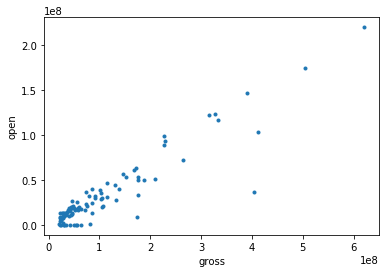

In [7]:
plt.plot(movies['total gross'],movies['open gross'],'.')
plt.xlabel('gross')
plt.ylabel('open')

7.Change the gross columns to integer data types.

In [8]:
movies['open gross'] = movies['open gross'].astype(int)
movies['total gross'] = movies['total gross'].astype(int)

8.Create another column called ratio that is given by the opening gross divided by the total gross. 

In [9]:
movies['ratio'] =  movies['open gross']/movies['total gross']

9.Sort the ratio from smallest to largest to find the biggest "sleeper" hit (meaning, the movie that didn't make that much in its opening weekend but made a lot of money later.)

In [10]:
movies.sort_values(by = 'ratio')

,movie,total gross,open gross,open date,ratio
83,Hostiles,29819114,22849,12/22,0.000766
45,The Shape of Water,63859435,166564,12/1,0.002608
49,Darkest Hour,56468410,175006,11/22,0.003099
73,Wind River,33800859,161558,8/4,0.004780
51,"Three Billboards Outside Ebbing, Missouri",54513740,322168,11/10,0.005910
38,The Post,81903458,526011,12/22,0.006422
95,Victoria and Abdul,22245070,158845,9/22,0.007141
55,Lady Bird,48958273,364437,11/3,0.007444
82,"I, Tonya",30014539,264155,12/8,0.008801
64,The Big Sick,42873127,421577,6/23,0.009833


10.Plot a histogram of the ratios. Make the rwidth by 0.9 and make the bins start at 0 and end at 1 in increments of 0.1. Label the axes.

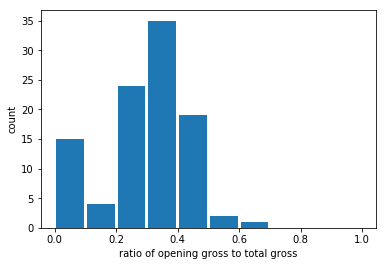

In [11]:
plt.hist(movies['ratio'],rwidth=0.9, bins=np.arange(0,1.1,.1))
plt.xlabel('ratio of opening gross to total gross')
plt.ylabel('count')

11.Update the open date column to include the year 2017. For example, the string 06/22 should become the string 06/22/2017. 

In [12]:
movies['open date'] = movies['open date'] + '/2017'

12.Use the built-in pandas datetime capability to convert the opening date column to a datetime object. (Datetime objects have built in chronological ordering to them, so your computer will know that 06/22/2017 comes before 06/22/2018).

In [13]:
movies['open date'] = pd.to_datetime(movies['open date'], format = '%m/%d/%Y')

13.Make another column called "open month" that just includes the opening month of the opening date. Pandas datetime capabilities can do this for us.

In [14]:
movies['open month'] = movies['open date'].dt.month

14.Create a frequency table to find the most popular month for blockbuster hits.

In [15]:
movies['open month'].value_counts()

12    13
6     12
11    11
10     8
8      8
3      8
9      7
7      7
5      7
2      7
1      7
4      5
Name: open month, dtype: int64

15.Create a histogram of the months. Make the rwidth be 0.9 and the bins start at 0.5 and end at 12.5 in increments of 1.

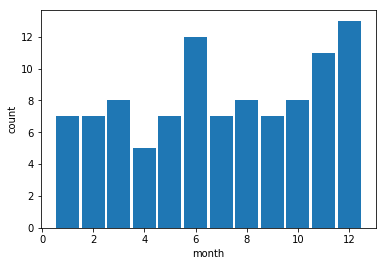

In [16]:
plt.hist(movies['open month'],rwidth = 0.9, bins=np.arange(0.5,13.5,1))
plt.xlabel('month')
plt.ylabel('count')

16.Okay. Now we're going to add director info to our dataframe, which wasn't included on the website up above. Create an empty string column for the director in your dataframe called "director".

In [17]:
movies['director'] = ''

17.Go to the website http://www.boxofficemojo.com/yearly/chart/?yr=2017&p=.htm . Find the XPath of the first movie name listed by right clicking on the movie name, choosing Inspect, right clicking on the blue highlighted portion, and choosing Copy - Copy XPath. The copied XPath should look like:



<img src="images/scrape1.png" style="width: 300px;"/>



<img src="images/scrape2.png" style="width: 400px;"/>


In [18]:
# //*[@id="body"]/table[3]/tbody/tr/td[1]/table/tbody/tr[2]/td/table/tbody/tr[2]/td[2]/b/font/a

18.Use Selenium to click on the movie name link and then print the director's name below.

In [25]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chromedriver = "/usr/local/bin/chromedriver"
driver = webdriver.Chrome(chromedriver)
url = 'http://www.boxofficemojo.com/yearly/chart/?yr=2017&p=.htm'
driver.get(url)
text = '//*[@id="body"]/table[3]/tbody/tr/td[1]/table/tbody/tr[2]/td/table/tbody/tr[2]/td[2]/b/font/a'
movie = driver.find_element_by_xpath(text).click()
text = '//*[@id="body"]/table[2]/tbody/tr/td/table[2]/tbody/tr[2]/td/table/tbody/tr/td[1]/table/tbody/tr/td[2]/div/div[2]/table/tbody/tr[1]/td[2]/font/a'
director = driver.find_element_by_xpath(text)
print(director.text)
driver.close()

Rian Johnson


19.Okay, so we'll want to iterate through all of the movies in the list located at http://www.boxofficemojo.com/yearly/chart/?yr=2017&p=.htm , click on their links, and save their directors. But we may run into a problem. Find the XPath of the second movie in the list and write it below. Is it the same as the first? If not, what is different?

In [20]:
# //*[@id="body"]/table[3]/tbody/tr/td[1]/table/tbody/tr[2]/td/table/tbody/tr[2]/td[2]/b/font/a
# //*[@id="body"]/table[3]/tbody/tr/td[1]/table/tbody/tr[2]/td/table/tbody/tr[3]/td[2]/b/font/a

20.To get around this, we actually won't search by XPath, because that is too specific. Right click and then inspect the first movie in the list again. You should see:

href="/movies/?id=starwars8.htm"....

The id will change from one movie to another but all of them start out as: 

href="/movies/..."

How do we search for this part? We can type:

movie_infos = driver.find_elements_by_xpath( '//a[contains(@href, "/movies/")]')

Note: This movie list will contain all of the movie info, so you will need a loop to iterate through each piece of movie info.

Second note: You'll want to save the HREF for each movie to a list called urls. 

Hint: look back to the get_attribute command in the Unit 11 Assignment if you forget how to do this.


In [24]:
chromedriver = "/usr/local/bin/chromedriver"
driver = webdriver.Chrome(chromedriver)
url = "http://www.boxofficemojo.com/yearly/chart/?yr=2017&p=.htm"
driver.get(url)
movie_infos = driver.find_elements_by_xpath( '//a[contains(@href, "/movies/")]')
movie_urls = []
for movie_info in movie_infos:
    movie_urls.append(movie_info.get_attribute('href'))
print(movie_urls)
driver.close()

with open('movieurls.txt', 'w') as f:
    for url in movie_urls:
        f.write(url+'\n')


['http://www.boxofficemojo.com/movies/?id=jurassicworldsequel.htm', 'http://www.boxofficemojo.com/movies/?id=starwars8.htm', 'http://www.boxofficemojo.com/movies/?id=beautyandthebeast2017.htm', 'http://www.boxofficemojo.com/movies/?id=wonderwoman.htm', 'http://www.boxofficemojo.com/movies/?id=jumanji2016.htm', 'http://www.boxofficemojo.com/movies/?id=marvel17a.htm', 'http://www.boxofficemojo.com/movies/?id=spiderman2017.htm', 'http://www.boxofficemojo.com/movies/?id=it.htm', 'http://www.boxofficemojo.com/movies/?id=marvel2017.htm', 'http://www.boxofficemojo.com/movies/?id=despicableme3.htm', 'http://www.boxofficemojo.com/movies/?id=dcfilm1117.htm', 'http://www.boxofficemojo.com/movies/?id=wolverine2017.htm', 'http://www.boxofficemojo.com/movies/?id=furious8.htm', 'http://www.boxofficemojo.com/movies/?id=pixar1117.htm', 'http://www.boxofficemojo.com/movies/?id=chrisnolan2017.htm', 'http://www.boxofficemojo.com/movies/?id=blumhouse2.htm', 'http://www.boxofficemojo.com/movies/?id=lego2.ht

21.The first movie url isn't actually a movie in our chart. Let's delete it:

In [22]:
del movie_urls[0]

22.Use Selenium to go to visit the first URL in your updated list of urls and print the director that you find from it.

In [65]:
chromedriver = "/usr/local/bin/chromedriver"
driver = webdriver.Chrome(chromedriver)
driver.get(movie_urls[0])
text = '//*[@id="body"]/table[2]/tbody/tr/td/table[2]/tbody/tr[2]/td/table/tbody/tr/td[1]/table/tbody/tr/td[2]/div/div[2]/table/tbody/tr[1]/td[2]/font/a'
director = driver.find_element_by_xpath(text).text
driver.close()
print(director)

Rian Johnson


23.Iterate through all of the urls in your list, finding each director. As you iterate through the list, immediately update your dataframe to include the director in the director column. 

First hint: Remember you can update the entry by typing something like:

movies['director'][i] = director name

Second hint: Several of your urls might mess up. Insert a try/except in order to try to get the director name, but if it fails, print the movie and the url that gave you the error.

Third hint: use something like "find_element_by_xpath( '//a[contains(@href, "/people/chart/?view=Director")]') to search for the director.

In [66]:
for i in range(len(movie_urls)):
    chromedriver = "/usr/local/bin/chromedriver"
    driver = webdriver.Chrome(chromedriver)
    url = movie_urls[i]
    driver.get(url)
    try:
        href = driver.find_element_by_xpath( '//a[contains(@href, "/people/chart/?view=Director")]')
        director = href.text
        movies['director'][i] = director
    except:
        print('BAD', i, movies['movie'][i], movie_urls[i])
        driver.close()
movies.head()


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


BAD 5 Spider-Man: Homecoming http://www.boxofficemojo.com/movies/?id=spiderman2017.htm
BAD 15 The LEGO Batman Movie http://www.boxofficemojo.com/movies/?id=lego2.htm
BAD 17 The Greatest Showman http://www.boxofficemojo.com/movies/?id=greatestshowman.htm
BAD 20 Cars 3 http://www.boxofficemojo.com/movies/?id=cars3.htm
BAD 28 Pitch Perfect 3 http://www.boxofficemojo.com/movies/?id=pitchperfect3.htm
BAD 35 The Emoji Movie http://www.boxofficemojo.com/movies/?id=theemojimovie.htm
BAD 46 The LEGO Ninjago Movie http://www.boxofficemojo.com/movies/?id=ninjago.htm
BAD 48 The Shack http://www.boxofficemojo.com/movies/?id=theshack.htm
BAD 51 Three Billboards Outside Ebbing, Missouri http://www.boxofficemojo.com/movies/?id=threebillboards.htm
BAD 54 The Dark Tower http://www.boxofficemojo.com/movies/?id=darktower.htm
BAD 61 All Eyez on Me http://www.boxofficemojo.com/movies/?id=tupac.htm
BAD 63 47 Meters Down http://www.boxofficemojo.com/movies/?id=47metersdown.htm
BAD 64 The Big Sick http://www.b

,movie,total gross,open gross,open date,ratio,open month,director
0,Star Wars: The Last Jedi,620181382,220009584,2017-12-15,0.354750,12,Rian Johnson
1,Beauty and the Beast (2017),504014165,174750616,2017-03-17,0.346718,3,Bill Condon
2,Wonder Woman,412563408,103251471,2017-06-02,0.250268,6,Patty Jenkins
3,Jumanji: Welcome to the Jungle,404515480,36169328,2017-12-20,0.089414,12,Jake Kasdan
4,Guardians of the Galaxy Vol. 2,389813101,146510104,2017-05-05,0.375847,5,James Gunn


24.The movies below are the movies who didn't get directors. Go to their movie links to investigate why. We can add in those directors manually by running the following code:

In [74]:
movies['director'][5] = 'Jon Watts'
movies['director'][15] = 'Chris McKay'
movies['director'][17] = 'Michael Gracey'
movies['director'][20] = 'Brian Fee'
movies['director'][28] = 'Trish Sie'
movies['director'][35] = 'Tony Leondis'
movies['director'][46] = 'Charlie Bean'
movies['director'][48] = 'Stuart Hazeldine'
movies['director'][51] = 'Martin McDonagh'
movies['director'][54] = 'Nikolaj Arcel'
movies['director'][54] = 'Nikolaj Arcel'
movies['director'][61] = 'Benny Boom'
movies['director'][63] = 'Johannes Roberts'
movies['director'][64] = 'Michael Showalter'
movies['director'][66] = 'Timothy Reckart'
movies['director'][69] = 'Michael Spierig'
movies['director'][72] = 'Stella Meghie'
movies['director'][73] = 'Taylor Sheridan'
movies['director'][76] = 'Richie Keen'
movies['director'][77] = 'Ken Marino'
movies['director'][78] = 'Luis Prieto'
movies['director'][79] = 'Anna Foerster'
movies['director'][80] = 'Hany Abu-Assad'
movies['director'][86] = 'F. Javier Gutiérrez'
movies['director'][88] = 'Hallie Meyers-Shyer'
movies['director'][94] = 'Stacy Title'
movies['director'][96] = 'Lucia Aniello'
movies['director'][97] = 'Jayson Thiessen'
movies['director'][98] = 'Eric Summer'

/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/shareshianl/anaconda/lib/python3.6/site

25.You definitely won't want to run the above code again because it takes so long. Pickle your dataframe so you can work with it later.

In [77]:
movies.to_pickle('movies.pkl')

26.Read the dataframe back in (and call it movies again) from the pickle file to make sure it saved correctly.

In [78]:
movies = pd.read_pickle('movies.pkl')
movies.head()

,movie,total gross,open gross,open date,ratio,open month,director
0,Star Wars: The Last Jedi,620181382,220009584,2017-12-15,0.354750,12,Rian Johnson
1,Beauty and the Beast (2017),504014165,174750616,2017-03-17,0.346718,3,Bill Condon
2,Wonder Woman,412563408,103251471,2017-06-02,0.250268,6,Patty Jenkins
3,Jumanji: Welcome to the Jungle,404515480,36169328,2017-12-20,0.089414,12,Jake Kasdan
4,Guardians of the Galaxy Vol. 2,389813101,146510104,2017-05-05,0.375847,5,James Gunn


27.Use value_counts in decending order on the director dataframe to view which director had the most top 100 movies in 2017.

In [40]:
movies.director.value_counts(ascending = False)

Ridley Scott           2
Rupert Sanders         1
Greta Gerwig           1
Guillermo del Toro     1
Hany Abu-Assad         1
Tyler Perry            1
Daniel Espinosa        1
Dean Israelite         1
David F. Sandberg      1
Scott Cooper           1
David Leitch           1
Matt Reeves            1
Hallie Meyers-Shyer    1
Pierre Coffin          1
Kenneth Branagh        1
Steven Spielberg       1
Steven Soderbergh      1
Nikolaj Arcel          1
Taika Waititi          1
Aaron Sorkin           1
James Gunn             1
Jon Watts              1
Martin McDonagh        1
F. Javier Gutiérrez    1
Patrick Hughes         1
Jon Lucas              1
Chad Stahelski         1
Lucia Aniello          1
Guy Ritchie            1
Jayson Thiessen        1
                      ..
Jonathan Levine        1
James Franco           1
Chris McKay            1
Marc Webb              1
Malcolm D. Lee         1
Jordan Vogt-Roberts    1
F. Gary Gray           1
Rian Johnson           1
James Foley            1


28.Print all of the movie info for the movies that this director made.

In [79]:
movies[movies['director']=='Ridley Scott']

,movie,total gross,open gross,open date,ratio,open month,director
41,Alien: Covenant,74262031,36160621,2017-05-19,0.486933,5,Ridley Scott
91,All the Money in the World,25113707,5584684,2017-12-25,0.222376,12,Ridley Scott
